In [17]:
import numpy as np
from scipy.linalg import eigh


np.random.seed(100)  # Set seed for reproducibility



# Function to generate a random symmetric matrix
def generate_symmetric_matrix(d):
    # Create random values from U[-1, 1] for upper triangular part
    mat = np.random.uniform(-1, 1, size=(d, d))
    
    # Make the matrix symmetric
    mat = np.triu(mat)
    mat += mat.T - np.diag(mat.diagonal())
    
    return mat

# Function to correct the matrix to be positive definite
def make_positive_definite(mat, epsilon=1e-6):
    # Eigen decomposition
    eigenvalues, eigenvectors = eigh(mat)
    
    # If the smallest eigenvalue is negative, shift all eigenvalues
    lambda_min = np.min(eigenvalues)
    if lambda_min <= 0:
        mat += np.eye(mat.shape[0]) * (-lambda_min + epsilon)
    
    return mat

# Function to convert a covariance matrix to a correlation matrix
def cov_to_corr(mat):
    d = np.sqrt(np.diag(mat))
    return mat / np.outer(d, d)

# Function to generate a valid correlation matrix
def generate_correlation_matrix(d):
    # Step 1: Generate a random symmetric matrix
    sym_mat = generate_symmetric_matrix(d)
    
    # Step 2: Make it positive definite
    pos_def_mat = make_positive_definite(sym_mat)
    
    # Step 3: Convert to a correlation matrix
    cor_mat = cov_to_corr(pos_def_mat)
    
    return cor_mat

# Generate three 3x3 correlation matrices
cor_matrix_1 = generate_correlation_matrix(3)
cor_matrix_2 = generate_correlation_matrix(3)
cor_matrix_3 = generate_correlation_matrix(3)

# Print the matrices
print("Correlation Matrix 1:\n", cor_matrix_1)
print("Correlation Matrix 2:\n", cor_matrix_2)
print("Correlation Matrix 3:\n", cor_matrix_3)

covs = [cor_matrix_1, cor_matrix_2, cor_matrix_3]


Correlation Matrix 1:
 [[ 1.         -0.38149876 -0.11158816]
 [-0.38149876  1.         -0.87602423]
 [-0.11158816 -0.87602423  1.        ]]
Correlation Matrix 2:
 [[ 1.          0.86166832 -0.57752613]
 [ 0.86166832  1.         -0.91191986]
 [-0.57752613 -0.91191986  1.        ]]
Correlation Matrix 3:
 [[ 1.         -0.26329275 -0.34083187]
 [-0.26329275  1.         -0.81720848]
 [-0.34083187 -0.81720848  1.        ]]


In [18]:
# Draw three random 3-dimensional vectors from a standard normal distribution
means = np.random.normal(loc=0, scale=1, size=(3, 3))

# Print the means of the three components
print("Means of the three components:\n", means)

Means of the three components:
 [[ 0.78148842 -0.65438103  0.04117247]
 [-0.20191691 -0.87081315  0.22893207]
 [-0.40803994 -0.10392514  1.56717879]]


In [19]:
# Define the parameters (alpha) for the Dirichlet distribution
alpha = [1, 1, 1]  # This can be adjusted as needed

# Draw one observation from the Dirichlet distribution
mixture_proportions = np.random.dirichlet(alpha)

# Print the mixture proportions
print("Mixture proportions:\n", mixture_proportions)

Mixture proportions:
 [0.52707635 0.46198159 0.01094205]


In [20]:
from numpy.random import multivariate_normal

# Number of observations to draw
n_observations = 100

# Draw 100 component labels based on the mixture proportions
component_labels = np.random.choice([0, 1, 2], size=n_observations, p=mixture_proportions)

# Initialize an array to hold the 100 observations
observations = np.zeros((n_observations, 3))

# Draw observations based on the assigned component
for i in range(n_observations):
    component = component_labels[i]
    observations[i] = multivariate_normal(mean=means[component], cov=covs[component])

# Print the first 10 observations as a preview
print("First 10 observations from the mixture distribution:\n", observations[:10])

First 10 observations from the mixture distribution:
 [[ 1.03437446 -0.19540908 -0.58613688]
 [-0.49510891 -0.46670823 -0.65417836]
 [-1.75316518 -1.50663894 -0.00297069]
 [-0.70306813 -2.01938836  2.28087281]
 [ 1.34074506 -1.76871687  0.94502681]
 [-1.04319749 -1.81797117  1.07462727]
 [-1.58884898 -1.58743737  0.25716935]
 [-0.87808325 -2.19561599  1.81025318]
 [ 2.26594668 -0.93713816 -0.42914574]
 [-0.64867501 -1.63151859  1.0877877 ]]


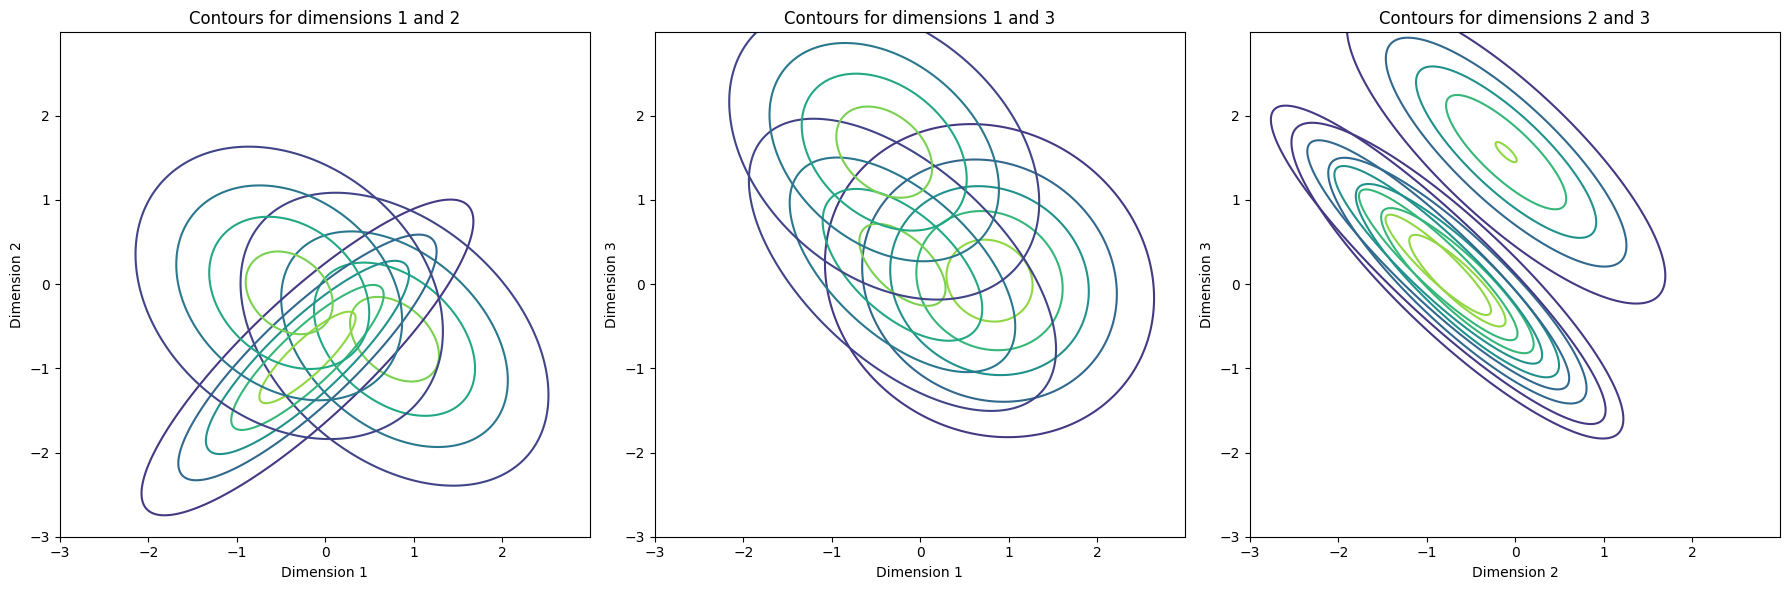

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define a function to plot contour plots for the mixture components
def plot_marginal_contours(means, covs, mixture_proportions, pairs):
    x, y = np.mgrid[-3:3:.01, -3:3:.01]  # Grid for contour plots

    fig, axs = plt.subplots(1, len(pairs), figsize=(18, 6))

    # Iterate over each pair of dimensions
    for idx, (i, j) in enumerate(pairs):
        ax = axs[idx]
        ax.set_title(f"Contours for dimensions {i+1} and {j+1}")

        # Compute the contour for each component in the mixture
        for k in range(3):
            mean_ij = [means[k][i], means[k][j]]  # Select the means for the pair
            cov_ij = np.array([[covs[k][i, i], covs[k][i, j]], 
                               [covs[k][j, i], covs[k][j, j]]])  # Marginal covariance matrix

            # Generate the multivariate normal for this pair of dimensions
            rv = multivariate_normal(mean=mean_ij, cov=cov_ij)

            # Calculate the weighted probability density for this component
            z = mixture_proportions[k] * rv.pdf(np.dstack((x, y)))

            # Plot the contour
            ax.contour(x, y, z, levels=5)

        ax.set_xlabel(f'Dimension {i+1}')
        ax.set_ylabel(f'Dimension {j+1}')

    plt.tight_layout()
    plt.show()

# Define the pairs of dimensions to plot
pairs = [(0, 1), (0, 2), (1, 2)]  # Pairs of (1,2), (1,3), (2,3)

# Call the function to plot the contours
plot_marginal_contours(means, covs, mixture_proportions, pairs)


In [22]:
import numpy as np
from scipy.stats import f

# Step 1: Select the two closest clusters
# Assuming 'observations' contains the 100 observations from the mixture model
# Assuming 'component_labels' contains the cluster labels (0, 1, 2)
cluster_1 = observations[component_labels == 1]
cluster_2 = observations[component_labels == 2]

# Step 2: Compute the sample means for both clusters
mean_1 = np.mean(cluster_1, axis=0)
mean_2 = np.mean(cluster_2, axis=0)

# Step 3: Compute the pooled covariance matrix
n1 = len(cluster_1)
n2 = len(cluster_2)
cov_1 = np.cov(cluster_1, rowvar=False)
cov_2 = np.cov(cluster_2, rowvar=False)

# Pooled (common) covariance matrix
pooled_cov = ((n1 - 1) * cov_1 + (n2 - 1) * cov_2) / (n1 + n2 - 2)

# Step 4: Compute Hotelling's T^2 statistic
diff_means = mean_1 - mean_2
T_squared = np.dot(np.dot(diff_means.T, np.linalg.inv(pooled_cov)), diff_means) * (n1 * n2) / (n1 + n2)

# Step 5: Convert T^2 to F-statistic
p = cluster_1.shape[1]  # Number of dimensions (3 in this case)
df1 = p
df2 = n1 + n2 - p - 1

F_statistic = T_squared * df2 / (df1 * (n1 + n2 - 2))

# Step 6: Calculate the p-value
p_value = 1 - f.cdf(F_statistic, df1, df2)

# Print the results
print("Hotelling's T^2 statistic:", T_squared)
print("F-statistic:", F_statistic)
print("Degrees of freedom:", df1, "and", df2)
print("p-value:", p_value)


Hotelling's T^2 statistic: 1040.674812406116
F-statistic: 329.97006247023194
Degrees of freedom: 3 and 39
p-value: 1.1102230246251565e-16


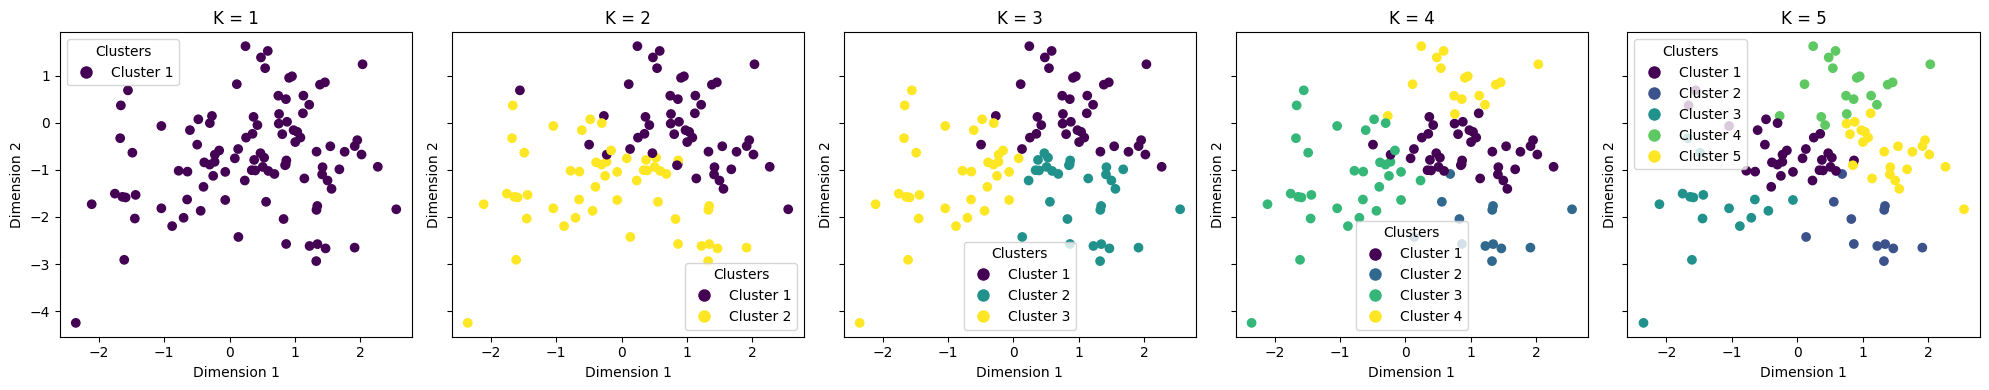

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'observations' contains the 100 observations (3-dimensional data points)

# Define a range of K values
K_values = range(1, 6)

# Choose which dimensions to plot (e.g., dimensions 0 and 1)
dim1, dim2 = 0, 1

# Create subplots for each K value
fig, axs = plt.subplots(1, len(K_values), figsize=(20, 4), sharey=True)

# Perform K-means clustering for each K and plot
for idx, K in enumerate(K_values):
    kmeans = KMeans(n_clusters=K, random_state=42)
    labels = kmeans.fit_predict(observations)  # Predict cluster labels for the original data
    
    ax = axs[idx]
    scatter = ax.scatter(observations[:, dim1], observations[:, dim2], c=labels, cmap='viridis', marker='o')
    ax.set_title(f'K = {K}')
    ax.set_xlabel(f'Dimension {dim1 + 1}')
    ax.set_ylabel(f'Dimension {dim2 + 1}')
    
    # Create a legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(K)]
    ax.legend(handles, [f'Cluster {i+1}' for i in range(K)], title="Clusters")

plt.tight_layout()
plt.show()


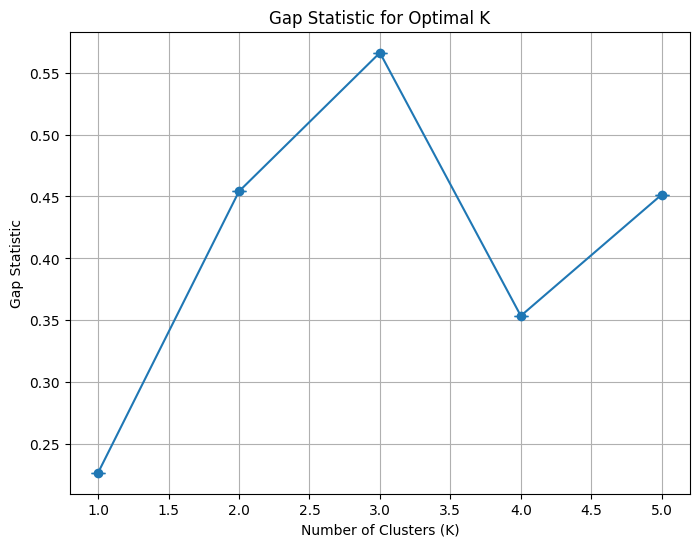

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.datasets import make_blobs

def compute_wcss(X, labels, K):
    """Compute Within-Cluster Sum of Squares (WCSS) for the given clusters."""
    wcss = np.sum([np.sum(np.square(pairwise_distances_argmin_min(X, X[labels == k])[1])) for k in range(K)])
    return wcss

def gap_statistic(X, K_values, n_refs=10):
    """Calculate the Gap Statistic for a range of K values."""
    gaps = []
    gaps_std = []
    
    # Generate reference data
    n_samples, n_features = X.shape
    reference_data = np.random.uniform(low=np.min(X, axis=0), high=np.max(X, axis=0), size=(n_samples, n_features))
    
    for K in K_values:
        # Compute WCSS for the actual data
        kmeans = KMeans(n_clusters=K, random_state=42)
        kmeans.fit(X)
        wcss_actual = compute_wcss(X, kmeans.labels_, K)
        
        # Compute WCSS for reference data
        wcss_refs = np.zeros(n_refs)
        for i in range(n_refs):
            kmeans_ref = KMeans(n_clusters=K, random_state=42)
            kmeans_ref.fit(reference_data)
            wcss_refs[i] = compute_wcss(reference_data, kmeans_ref.labels_, K)
        
        # Compute Gap statistic
        gap = np.mean(np.log(wcss_refs)) - np.log(wcss_actual)
        gap_std = np.std(np.log(wcss_refs)) / np.sqrt(n_refs)
        
        gaps.append(gap)
        gaps_std.append(gap_std)
    
    return np.array(gaps), np.array(gaps_std)

# Sample data
# Assuming 'observations' contains the 100 observations (3-dimensional data points)
X = observations

# Define a range of K values
K_values = range(1, 6)

# Compute the Gap Statistic
gaps, gaps_std = gap_statistic(X, K_values)

# Plot the Gap Statistic
plt.figure(figsize=(8, 6))
plt.errorbar(K_values, gaps, yerr=gaps_std, fmt='-o', capsize=5)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for Optimal K')
plt.grid(True)
plt.show()


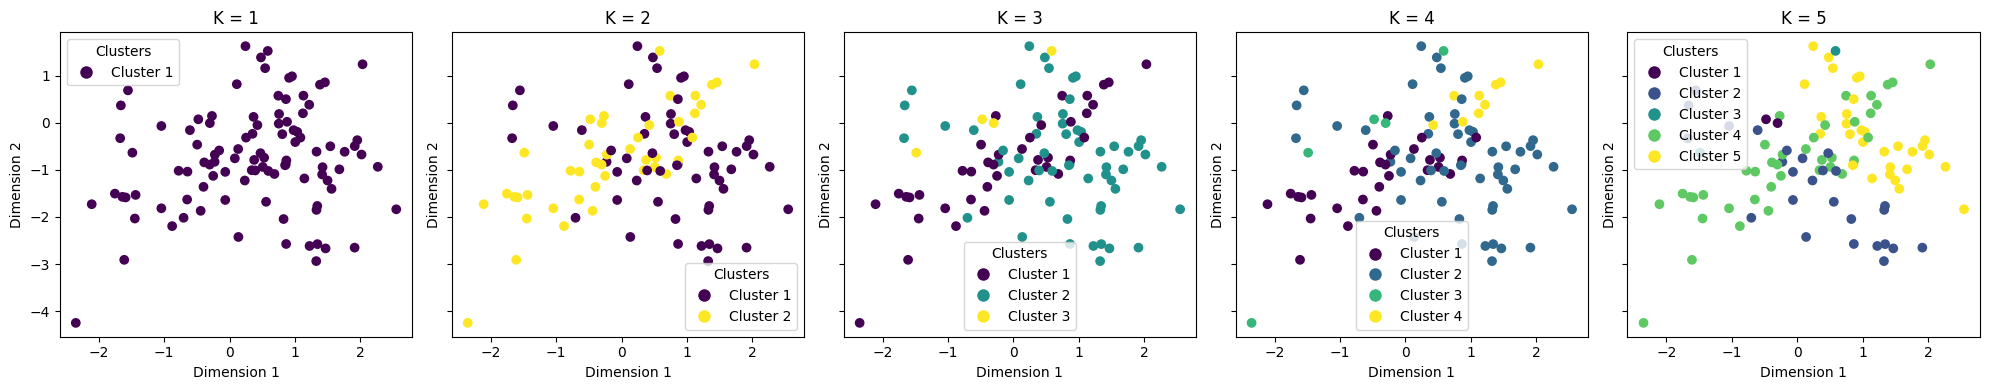

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Assuming 'observations' contains the 100 observations (3-dimensional data points)

# Define a range of K values
K_values = range(1, 6)

# Choose which dimensions to plot (e.g., dimensions 0 and 1)
dim1, dim2 = 0, 1

# Create subplots for each K value
fig, axs = plt.subplots(1, len(K_values), figsize=(20, 4), sharey=True)

# Perform GMM clustering for each K and plot
for idx, K in enumerate(K_values):
    gmm = GaussianMixture(n_components=K, random_state=42)
    labels = gmm.fit_predict(observations)  # Predict cluster labels for the original data
    
    ax = axs[idx]
    scatter = ax.scatter(observations[:, dim1], observations[:, dim2], c=labels, cmap='viridis', marker='o')
    ax.set_title(f'K = {K}')
    ax.set_xlabel(f'Dimension {dim1 + 1}')
    ax.set_ylabel(f'Dimension {dim2 + 1}')
    
    # Create a legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(K)]
    ax.legend(handles, [f'Cluster {i+1}' for i in range(K)], title="Clusters")

plt.tight_layout()
plt.show()


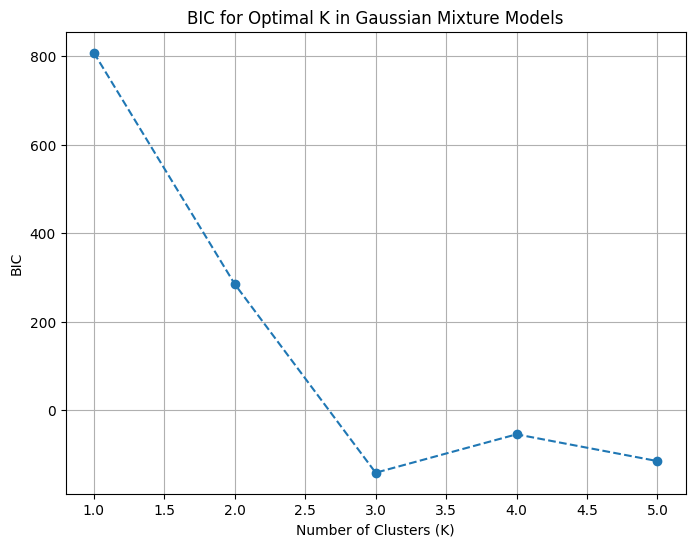

The optimal number of clusters based on BIC is: 3


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Assuming 'observations' contains the 100 observations (3-dimensional data points)

# Define a range of K values
K_values = range(1, 6)

# List to store BIC values for each K
bic_values = []

# Fit GMM and compute BIC for each K
for K in K_values:
    gmm = GaussianMixture(n_components=K, random_state=42)
    gmm.fit(observations)
    bic_values.append(gmm.bic(observations))

# Plot BIC values
plt.figure(figsize=(8, 6))
plt.plot(K_values, bic_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('BIC')
plt.title('BIC for Optimal K in Gaussian Mixture Models')
plt.grid(True)
plt.show()

# Print the optimal K value
optimal_K = K_values[np.argmin(bic_values)]
print(f'The optimal number of clusters based on BIC is: {optimal_K}')


MAXIMISE GAP Statisic
MINIMISE BIC